# Predicting House Prices - A case study with SciKit Learn and Pandas

## Introduction to Pandas

Pandas is a module in Python that is great for handling lots of data. We'll be relying on it today to help us sort, reshape, and clean up our data. 

> **From the Pandas documentation:**
>
> Here are just a few of the things that pandas does well:
>
> - Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

Let's get a sense of how it works with a test data set from a weather report.

In [1]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

The building blocks of pandas are called Series and DataFrames. A Dataframe is essentially a table, like shown below:

<img src='images/dataframe.png'>

Each row of the dataframe will be one specific record, and each column will be some aspect of that record. That will make more sense when we look at an example. Series are individual rows or columns (essentially if we break apart that dataframe into a single set of numbers). Let's look at that in action.

To begin with, we're going to read in some data from a CSV.

In [2]:
weather = pd.read_csv('data/weather.csv')
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Here we got our table, and it shows us that we're looking at the hourly weather at some point. We can see that the temperature was below freezing for each of the first four hours, that there was some fog, and that it was a little bit windy. We used `weather.head()` to show us just the first few rows. Otherwise, it would show us a HUGE data amount. We can look at the last few rows with `weather.tail()`

In [3]:
weather.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


Now let's use a Pandas built-in function to learn a little about our data.

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
Date/Time             8784 non-null object
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


We can also look to see how much of our data makes sense by asking it to look at the numeric columns and give us some stats about them.

In [5]:
weather.describe()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [6]:
weather.shape

(8784, 8)

Great, looks like these are all behaving relatively as expected! That's lovely. Now let's learn how to grab some data from the DataFrame. Also, let's look at what a Series is. To start with, let's grab a column from our data.

In [7]:
weather['Temp (C)']

0       -1.8
1       -1.8
2       -1.8
3       -1.5
4       -1.5
5       -1.4
6       -1.5
7       -1.4
8       -1.4
9       -1.3
10      -1.0
11      -0.5
12      -0.2
13       0.2
14       0.8
15       1.8
16       2.6
17       3.0
18       3.8
19       3.1
20       3.2
21       4.0
22       4.4
23       5.3
24       5.2
25       4.6
26       3.9
27       3.7
28       2.9
29       2.6
        ... 
8754   -12.6
8755   -13.4
8756   -13.8
8757   -13.8
8758   -13.7
8759   -12.1
8760   -11.1
8761   -10.7
8762   -10.1
8763   -11.8
8764   -10.5
8765   -10.2
8766    -9.7
8767    -9.3
8768    -8.6
8769    -8.1
8770    -7.4
8771    -6.7
8772    -5.8
8773    -4.6
8774    -3.4
8775    -2.3
8776    -1.4
8777    -1.1
8778    -1.3
8779     0.1
8780     0.2
8781    -0.5
8782    -0.2
8783     0.0
Name: Temp (C), Length: 8784, dtype: float64

This is a series! It has both the index (the left side) and the value. So we know which row it is and what the value is. That's pretty sweet. What can we do with a series? One really handy thing is getting the number of times a value shows up. Let's see that in action.

In [8]:
weather['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

Cool. Now how do we access rows? We have to play a little bit of pandas games to do so. We'll use `.iloc` to do the job. Let's demonstrate by grabbing the first (0th) row.

In [12]:
weather.iloc[0]

Date/Time             2012-01-01 00:00:00
Temp (C)                             -1.8
Dew Point Temp (C)                   -3.9
Rel Hum (%)                            86
Wind Spd (km/h)                         4
Visibility (km)                         8
Stn Press (kPa)                    101.24
Weather                               Fog
Name: 0, dtype: object

We can get multiple rows by following Python's conventions like so:

In [13]:
weather.iloc[10:13]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
10,2012-01-01 10:00:00,-1.0,-2.3,91,9,1.2,101.15,Fog
11,2012-01-01 11:00:00,-0.5,-2.1,89,7,4.0,100.98,Fog
12,2012-01-01 12:00:00,-0.2,-2.0,88,9,4.8,100.79,Fog


We also might want to select multiple columns. We can do that like this:

In [14]:
weather[['Temp (C)',"Dew Point Temp (C)"]].head()

,Temp (C),Dew Point Temp (C)
0,-1.8,-3.9
1,-1.8,-3.7
2,-1.8,-3.4
3,-1.5,-3.2
4,-1.5,-3.3


That should be enough to get us started with Pandas... now let's move on to our case study, and we'll learn more about Pandas on the way.

## Building Regression Models with Scikit-Learn

In this section, we will walk through how to build regression models in scikit-learn.

We will load in a the Ames Housing Data, split into train and test sets, and build some models.

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf



In [15]:
datafile = "./data/Ames_Housing_Data.tsv"

In [16]:
df=pd.read_csv(datafile, sep='\t')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

### Data Dictionary
A description of the variables can be found here:

https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt



### Data Cleaning
From the above, and reading the documentation, here are a few things to note about this data set:
- SalePrice is our target variable
- The authors recommend removing the few houses that are >4000 SQFT (based on the 'Gr Liv Area' variable)
- Many columns have missing data (based on the number of "non-null" entries in each column
- We have many predictor variables

** An aside about pandas **

We can do filtering on the fly with pandas. Let's see what that means by looking at our weather data from above.

In [18]:
weather_test = weather[weather['Temp (C)'] == -1.8]
weather_test.head(10)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
164,2012-01-07 20:00:00,-1.8,-3.7,87,4,9.7,100.48,Snow
682,2012-01-29 10:00:00,-1.8,-8.3,61,24,24.1,100.87,Mostly Cloudy
927,2012-02-08 15:00:00,-1.8,-12.8,43,32,48.3,101.45,Mainly Clear
1081,2012-02-15 01:00:00,-1.8,-5.2,78,4,25.0,101.31,Cloudy
1216,2012-02-20 16:00:00,-1.8,-8.5,60,20,48.3,102.06,Mainly Clear
1298,2012-02-24 02:00:00,-1.8,-5.4,76,0,25.0,100.20,Clear
1328,2012-02-25 08:00:00,-1.8,-3.2,90,32,1.2,98.20,"Snow,Blowing Snow"


We can can pandas to only show us rows where some condition is true. In this case, we asked to only show when the temerature was -1.8 degrees Celsius. We can do the same type of thing with any conditions!

Now back to the housing data!

### Challenge 1: Remove all houses that are greater than 4000 sqft with filtering

- How many data points did we remove from the data set?

In [ ]:
## Next, let's restrict ourselves to just a few variables to get started

In [19]:
smaller_df= df[['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars','SalePrice']]

In [20]:
## Let's have a look at these variables

smaller_df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2929.000000,2930.000000
mean,10147.921843,6.094881,5.563140,1971.356314,1984.266553,1499.690444,1.566553,2.854266,0.599317,1.766815,180796.060068
std,7880.017759,1.411026,1.111537,30.245361,20.860286,505.508887,0.552941,0.827731,0.647921,0.760566,79886.692357
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7440.250000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9436.500000,6.000000,5.000000,1973.000000,1993.000000,1442.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11555.250000,7.000000,6.000000,2001.000000,2004.000000,1742.750000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5642.000000,4.000000,8.000000,4.000000,5.000000,755000.000000


In [21]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2930 non-null int64
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Gr Liv Area       2930 non-null int64
Full Bath         2930 non-null int64
Bedroom AbvGr     2930 non-null int64
Fireplaces        2930 non-null int64
Garage Cars       2929 non-null float64
SalePrice         2930 non-null int64
dtypes: float64(1), int64(10)
memory usage: 251.9 KB


In [22]:
# There appears to be one NA in Garage Cars - fill with 0
smaller_df = smaller_df.fillna(0)

In [23]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2930 non-null int64
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Gr Liv Area       2930 non-null int64
Full Bath         2930 non-null int64
Bedroom AbvGr     2930 non-null int64
Fireplaces        2930 non-null int64
Garage Cars       2930 non-null float64
SalePrice         2930 non-null int64
dtypes: float64(1), int64(10)
memory usage: 251.9 KB


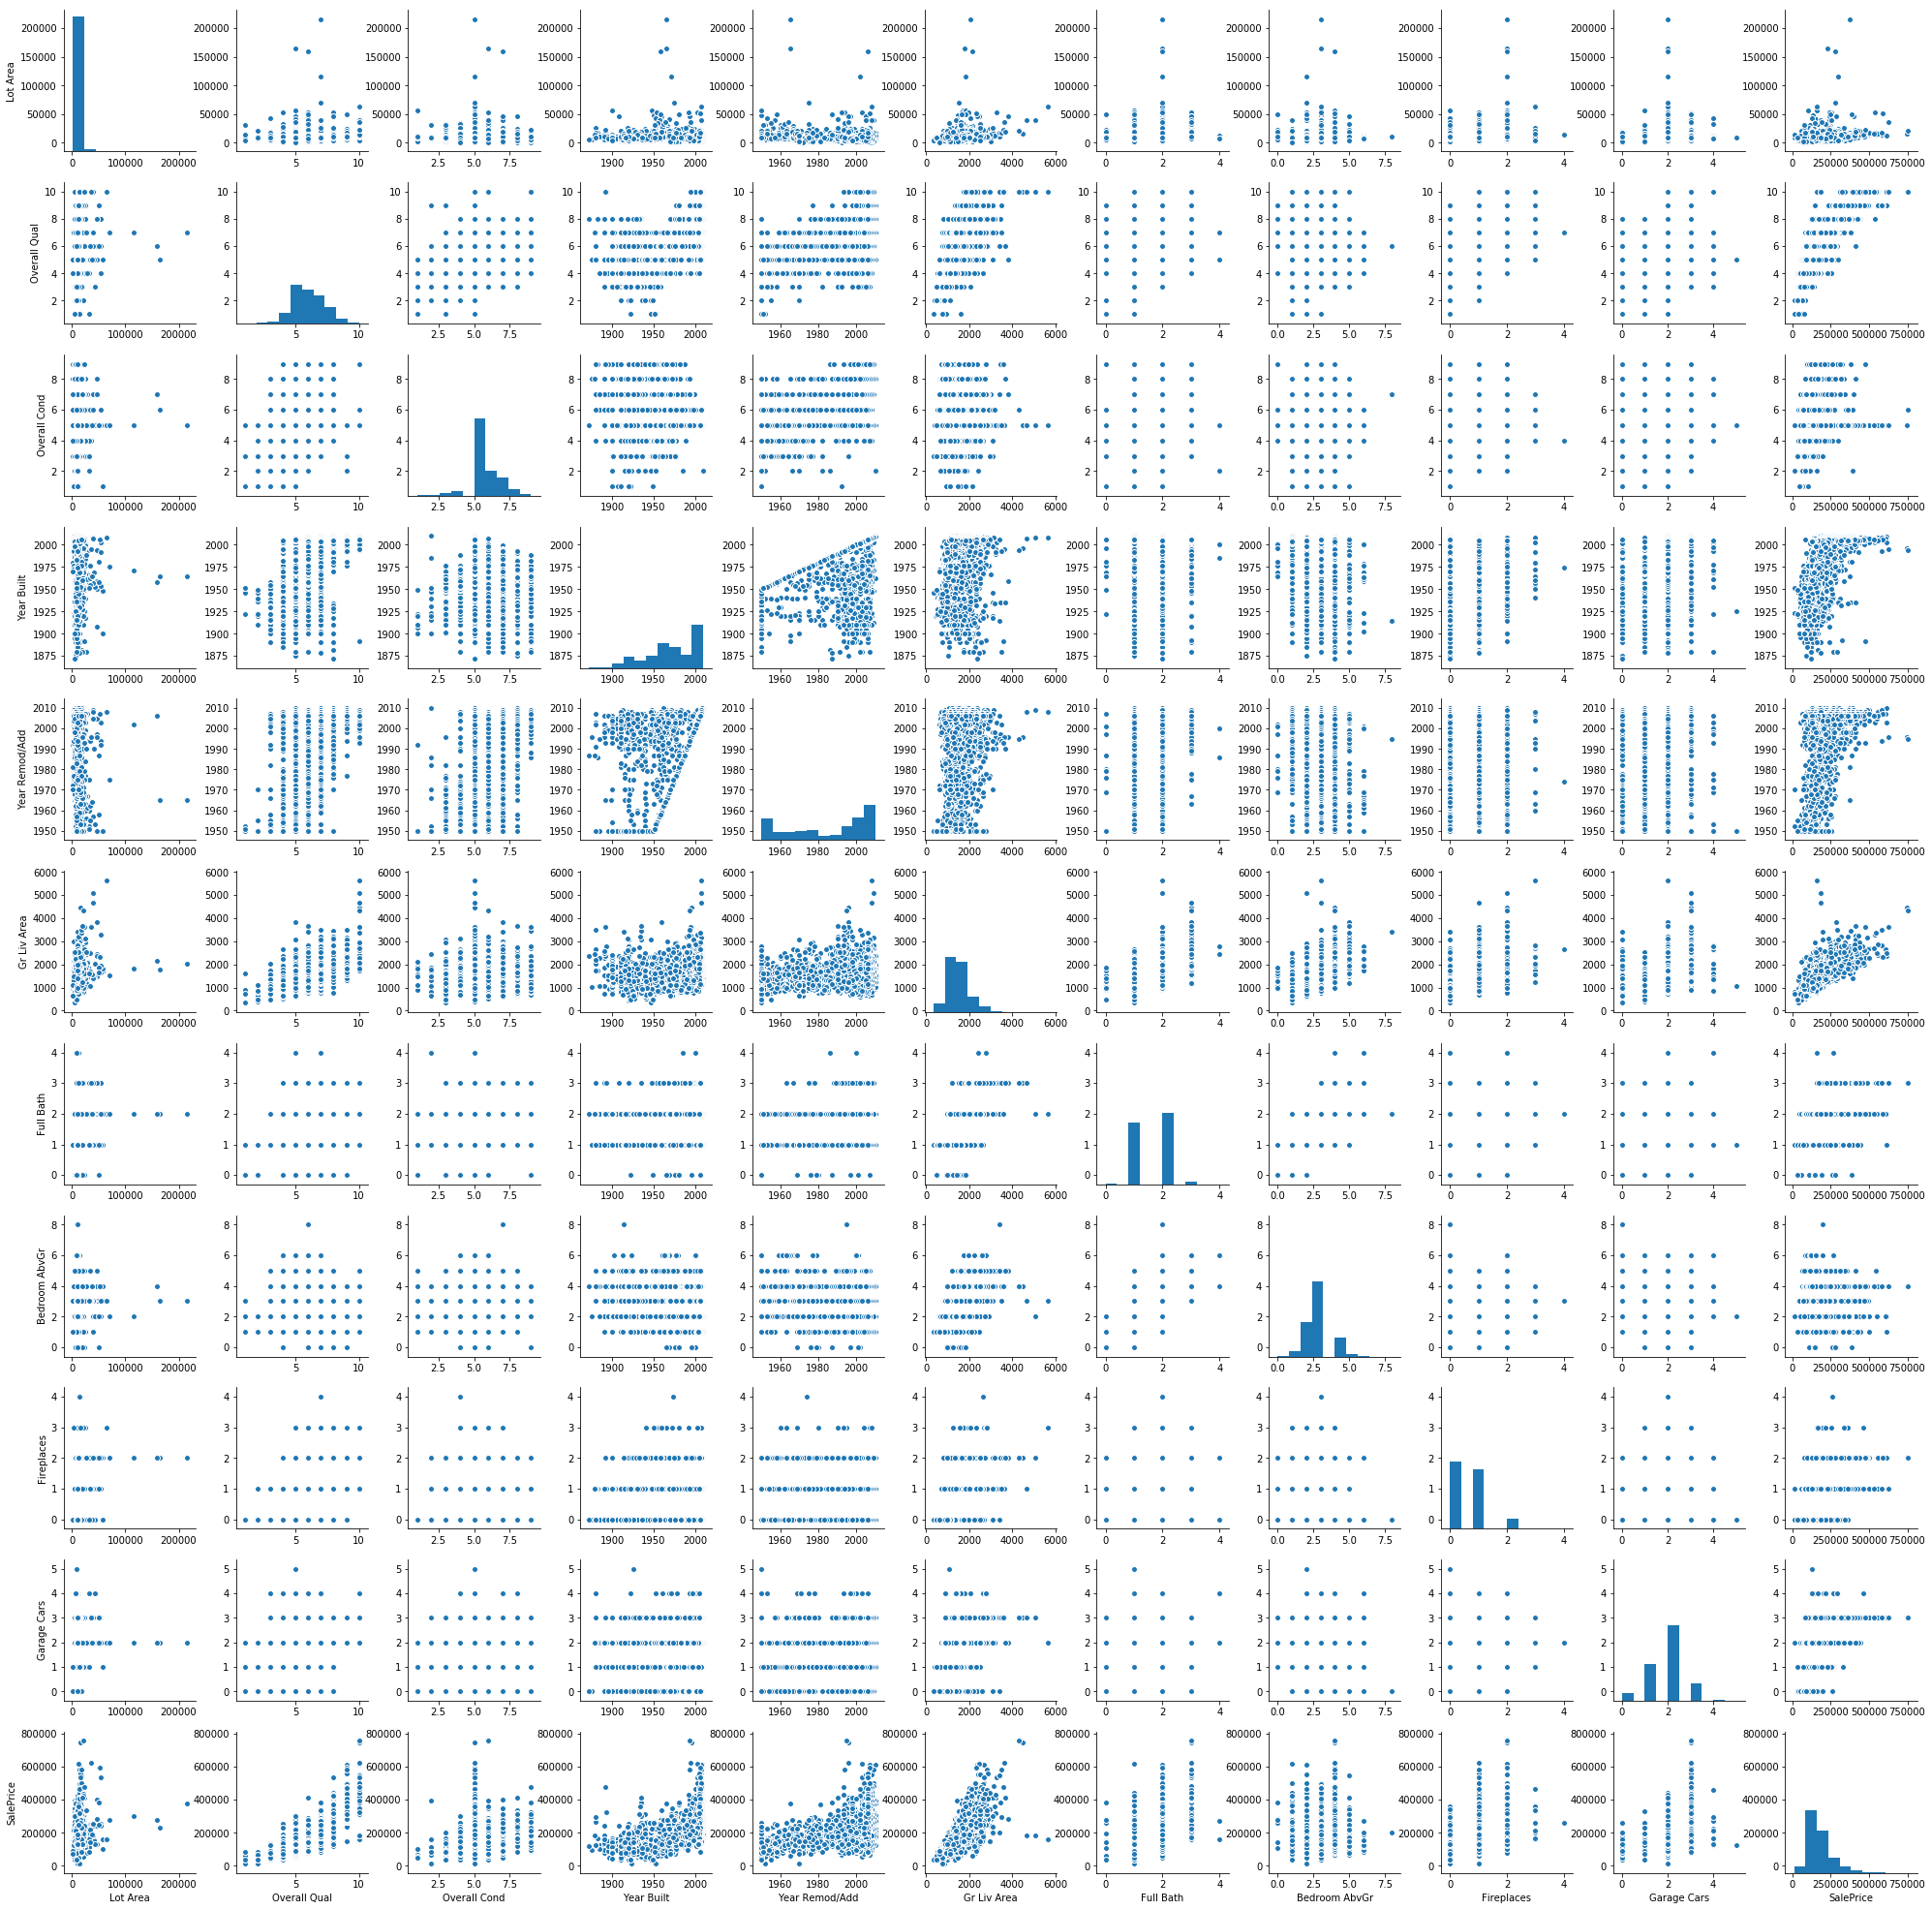

In [24]:
## Let's do a pairplot with seaborn to get a sense of the variables in this data set
sns.pairplot(smaller_df)

### Comprehension question
From the pairplot above:

- Which variables seem to have the strongest correlations with SalePrice?

In [25]:
# Let's make a X and y for our predictors and target, respectively

X=smaller_df[['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars']]

y=smaller_df['SalePrice']

### Train - Test Splits

Train-test splitting is a big part of the data science pipeline. The reason being, we're always trying to build models that perform well "in the wild." This means that in order to evaluate our model's performance, we need to test it on data that we didn't use when building the model. This means we often want to cut out some section of our data before we do any model-building; to save for use as a "evaluator" of how our model performs on data it's never seen before. 

<img src="train_test_split.png">

In SkLearn, we use `train_test_split` to do this, which allows us to randomly sample the data instead of taking one big chunk. 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [28]:
X_train.shape, X_test.shape

((2051, 10), (879, 10))

In [29]:
X_train.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars'],
      dtype='object')

## Linear Regression
In the first part of this notebook we will use linear regression.  We will start with a simple one-variable linear regression and then proceed to more complicated models.

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# First let us fit only on Living Area (sqft)
selected_columns_1 = ['Gr Liv Area']

### Sklearn Modeling
The package scikit-learn has a particular structure to their predictive modeling functionality.  Typically, a model is "defined" then it is "fit" (to a set of examples with their answers).  Then the trained model can be used to predict on a set of (unlabeled) data points.  We will walk through this process in the next few cells.

In [32]:
## First we define a `default` LinearRegression model and fit it to the data (with just `Gr Liv Area' as a predictor
## and SalePrice as the targer.)

lr_model1 = LinearRegression()
lr_model1.fit(X_train[selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
## Let us look at the (single) variable coefficient and the intercept
lr_model1.coef_, lr_model1.intercept_

(array([ 106.02207188]), 19859.938261830161)

### Comprehension Question
- What would this simple model predict as the sales price of a 1000 sq ft home?
- Does that seem reasonable? (Remember, these are house prices in Ames, Iowa between 2006 and 2010)

## Plotting the Regression Line
Let's use our knowledge of Matplotlib/Seaborn to make some plots of this data

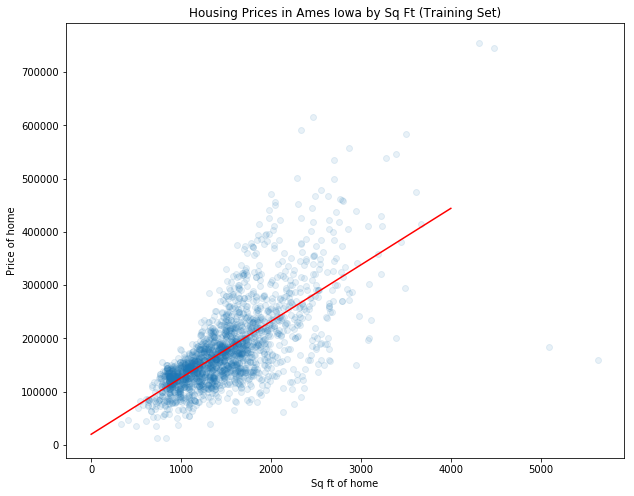

In [62]:
# TO DO: Make a scatterplot of the sales price (y-axis) vs the sq footage (x-axis) of the training data
# Then, plot the regression line we just computed over the data

plt.figure(figsize=(10,8))
plt.scatter(X_train['Gr Liv Area'],y_train,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Housing Prices in Ames Iowa by Sq Ft (Training Set)")
plt.xlabel("Sq ft of home")
plt.ylabel("Price of home");

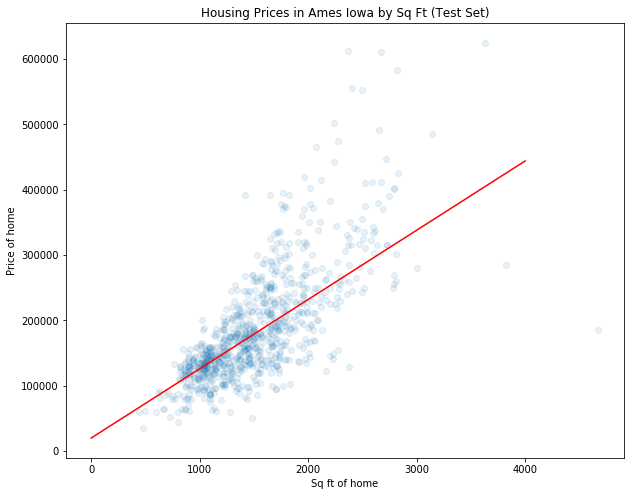

In [63]:
# Let's make a similar plot for the test set

plt.figure(figsize=(10,8))
plt.scatter(X_test['Gr Liv Area'],y_test,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Housing Prices in Ames Iowa by Sq Ft (Test Set)")
plt.xlabel("Sq ft of home")
plt.ylabel("Price of home");



In [36]:
# Let's get predictions of the model both on the training set and on the test set
# Note the use of the `model.predict(feature_matrix)` syntax

train_set_pred1 = lr_model1.predict(X_train[selected_columns_1])
test_set_pred1 = lr_model1.predict(X_test[selected_columns_1])

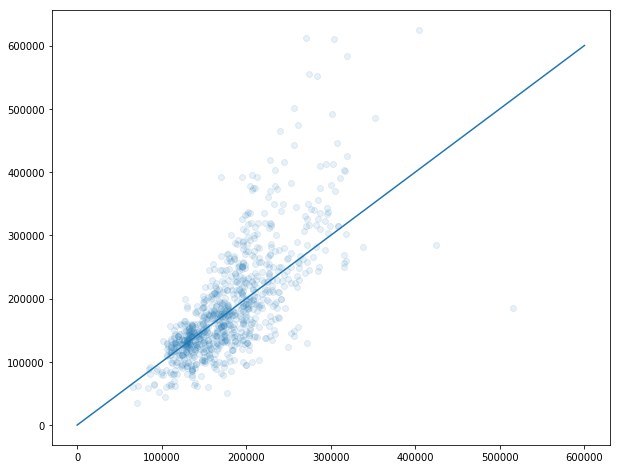

In [64]:
## Let's plot the actual vs expected house price (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

In [38]:
# How good is our model on the test set?

# Mean Squared Error
def mean_square_error(true, pred):
    return np.mean((pred - true)**2)

mean_square_error(y_test,test_set_pred1)

3433874576.211253

In [39]:
# Root Mean Square Error
def root_mean_square_error(true,pred):
    return np.sqrt(mean_square_error(true,pred))

root_mean_square_error(y_test,test_set_pred1)

58599.271123549421

In [40]:
# Mean Absolute Deviation
def mean_absolute_deviation(true,pred):
    return np.mean(np.abs(pred - true))

mean_absolute_deviation(y_test, test_set_pred1)

39739.79046436223

In [41]:
# R^2
def R2_score(true,pred):
    y_bar_test = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar_test)**2)
    return 1.-SSE/SST

R2_score(y_test, test_set_pred1)

0.5115001370340604

In [ ]:
## Now let's use another variable

In [42]:
selected_columns_2 = ['Lot Area', 'Overall Qual']

In [43]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train[selected_columns_2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lr_model2.coef_

array([  1.78514434e+00,   4.34275134e+04])

In [45]:
## This is a hack to show the variables next to their values
list(zip(selected_columns_2,lr_model2.coef_))

[('Lot Area', 1.7851443442189754), ('Overall Qual', 43427.513387466097)]

In [46]:
test_set_pred2 = lr_model2.predict(X_test[selected_columns_2])

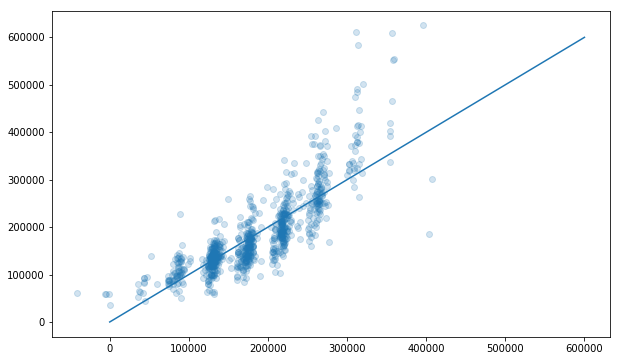

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred2,y_test,alpha=.2)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));

In [48]:
root_mean_square_error(y_test,test_set_pred2)

46522.988325519567

In [49]:
#MAD
mean_absolute_deviation(y_test,test_set_pred2)

32210.420914232625

In [50]:
R2_score(y_test,test_set_pred2)

0.6920960756672774

### Feature Engineering
Since there seems to be some non-linearity, let's make a new variable that is "Greater Living Area"^2. This is called feature engineering since we're "engineering (or making)" a new feature out of our old features.

In [51]:
X['GLA2'] = X['Gr Liv Area']**2
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'GLA2'],
      dtype='object')

In [52]:
## We need to recreate the train and test sets -- make sure you use the same random seed!
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [53]:
selected_columns_3 = ['Lot Area', 'Overall Qual', 'GLA2']

In [54]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train[selected_columns_3],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
list(zip(X_train[selected_columns_3].columns,lr_model3.coef_))

[('Lot Area', 1.1536920681656349),
 ('Overall Qual', 35444.624016929971),
 ('GLA2', 0.011725648128115706)]

In [56]:
test_set_pred3 = lr_model3.predict(X_test[selected_columns_3])

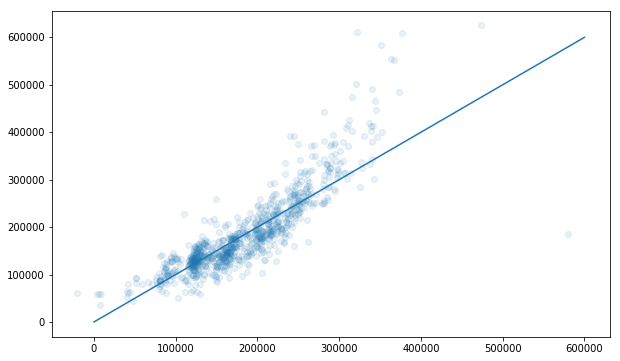

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred3,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));

In [58]:
#RMSE
root_mean_square_error(y_test,test_set_pred3)

42024.14115811493

In [59]:
#MAD
mean_absolute_deviation(y_test,test_set_pred3)

27701.86326053622

In [60]:
#R-squared
R2_score(y_test,test_set_pred3)

0.7487664060451766

## Exercise

We're now going to split into groups. Each group should attempt to build the best model they can using the techniques shown above. Some recommendations:

* Add some of the features we removed. But be careful, we haven't talked about how to handle categorical data, so your model won't work with categories.
* Do some feature engineering. We played with GLA^2, but there are more variables you can try things with. You might also try multiplying some features together to see if there are "interaction" terms.
* We've looked at the SkLearn Documentation, so you might also consider trying some different Regression Models - like RandomForestRegressor. Be careful though, you can't just plug-and-play some of the models into the exact same code. They don't all have coefficients for instance...

Go wild. After we finish up, each group will have a chance to describe what sort of work they tried and how their model performed!